## Surprise in Python Scikit

## 1. Introduction

  Surprise is a Python scikit building and analyzing recommender systems that deal with explicit rating data.

  Surprise was designed with the following purposes in mind:

  *   Give users perfect control over their experiments.
  *   Alleviate the pain of Dataset handling.
  *   Provide various ready-to-use prediction algorithms such as baseline algorithms, neighborhood methods, matrix factorization-based ( SVD, PMF, SVD++, NMF), and many others. Also, various similarity measures (cosine, MSD, pearson…) are built-in.
  *   Provide tools to evaluate, analyse and compare the algorithms performance. Cross-validation procedures can be run very easily using powerful CV iterators (inspired by scikit-learn excellent tools), as well as exhaustive search over a set of parameters.







## 2. Install
  
*   Open anaconda prompt
*   print "conda install -c conda-forge scikit-surprise"



## 3. Implement
Here is a simple example that load a dataset, split it for 5-fold cross-validation, and compute the MAE and RMSE of the SVD algorithm.


In [4]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate


# Load the movielens-100k dataset (download it if needed),
data = Dataset.load_builtin('ml-100k')

# We'll use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9409  0.9285  0.9373  0.9388  0.9337  0.9359  0.0043  
MAE (testset)     0.7419  0.7307  0.7385  0.7392  0.7373  0.7375  0.0037  
Fit time          8.36    12.61   11.17   8.80    9.78    10.14   1.57    
Test time         0.39    0.64    0.27    0.31    0.29    0.38    0.14    


{'test_rmse': array([0.94087565, 0.92852591, 0.93731733, 0.93883797, 0.93373556]),
 'test_mae': array([0.74187783, 0.73066922, 0.73849587, 0.73918931, 0.73729231]),
 'fit_time': (8.355990886688232,
  12.61011266708374,
  11.168712377548218,
  8.80344033241272,
  9.783380508422852),
 'test_time': (0.38837218284606934,
  0.6396145820617676,
  0.26725172996520996,
  0.3112962245941162,
  0.2912776470184326)}

Train-test split and the fit() method

In [5]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

# Load the movielens-100k dataset (download it if needed),
data = Dataset.load_builtin('ml-100k')

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the famous SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.9411


0.9410949218671426

Tune algorithm parameters with GridSearchCV

In [6]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import GridSearchCV

# Use movielens-100K
data = Dataset.load_builtin('ml-100k')

param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],'reg_all': [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9641341348178982
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


Use cross-validation iterators

In [8]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import KFold

# Load the movielens-100k dataset
data = Dataset.load_builtin('ml-100k')

# define a cross-validation iterator
kf = KFold(n_splits=3)

algo = SVD()

for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)

RMSE: 0.9444
RMSE: 0.9475
RMSE: 0.9432


There are lots of ready-to-use prediction algorithms in surprise package.

In [ ]:

'''This module runs a 5-Fold CV for all the algorithms (default parameters) on
the movielens datasets, and reports average RMSE, MAE, and total computation
time.  It is used for making tables in the README.md file'''

from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
import time
import datetime
import random

import numpy as np
import six
from tabulate import tabulate

from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise import NormalPredictor
from surprise import BaselineOnly
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering

# The algorithms to cross-validate
classes = (SVD, SVDpp, NMF, SlopeOne, KNNBasic, KNNWithMeans, KNNBaseline,
           CoClustering, BaselineOnly, NormalPredictor)

# ugly dict to map algo names and datasets to their markdown links in the table
stable = 'http://surprise.readthedocs.io/en/stable/'
LINK = {'SVD': '[{}]({})'.format('SVD',
                                 stable +
                                 'matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD'),
        'SVDpp': '[{}]({})'.format('SVD++',
                                   stable +
                                   'matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVDpp'),
        'NMF': '[{}]({})'.format('NMF',
                                 stable +
                                 'matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.NMF'),
        'SlopeOne': '[{}]({})'.format('Slope One',
                                      stable +
                                      'slope_one.html#surprise.prediction_algorithms.slope_one.SlopeOne'),
        'KNNBasic': '[{}]({})'.format('k-NN',
                                      stable +
                                      'knn_inspired.html#surprise.prediction_algorithms.knns.KNNBasic'),
        'KNNWithMeans': '[{}]({})'.format('Centered k-NN',
                                          stable +
                                          'knn_inspired.html#surprise.prediction_algorithms.knns.KNNWithMeans'),
        'KNNBaseline': '[{}]({})'.format('k-NN Baseline',
                                         stable +
                                         'knn_inspired.html#surprise.prediction_algorithms.knns.KNNBaseline'),
        'CoClustering': '[{}]({})'.format('Co-Clustering',
                                          stable +
                                          'co_clustering.html#surprise.prediction_algorithms.co_clustering.CoClustering'),
        'BaselineOnly': '[{}]({})'.format('Baseline',
                                          stable +
                                          'basic_algorithms.html#surprise.prediction_algorithms.baseline_only.BaselineOnly'),
        'NormalPredictor': '[{}]({})'.format('Random',
                                             stable +
                                             'basic_algorithms.html#surprise.prediction_algorithms.random_pred.NormalPredictor'),
        'ml-100k': '[{}]({})'.format('Movielens 100k',
                                     'http://grouplens.org/datasets/movielens/100k'),
        'ml-1m': '[{}]({})'.format('Movielens 1M',
                                   'http://grouplens.org/datasets/movielens/1m'),
        }


# set RNG
np.random.seed(0)
random.seed(0)

dataset = 'ml-1m'
data = Dataset.load_builtin(dataset)
kf = KFold(random_state=0)  # folds will be the same for all algorithms.

table = []
for klass in classes:
    start = time.time()
    out = cross_validate(klass(), data, ['rmse', 'mae'], kf)
    cv_time = str(datetime.timedelta(seconds=int(time.time() - start)))
    link = LINK[klass.__name__]
    mean_rmse = '{:.3f}'.format(np.mean(out['test_rmse']))
    mean_mae = '{:.3f}'.format(np.mean(out['test_mae']))

    new_line = [link, mean_rmse, mean_mae, cv_time]
    print(tabulate([new_line], tablefmt="pipe"))  # print current algo perf
    table.append(new_line)

header = [LINK[dataset],
          'RMSE',
          'MAE',
          'Time'
          ]
print(tabulate(table, header, tablefmt="pipe"))

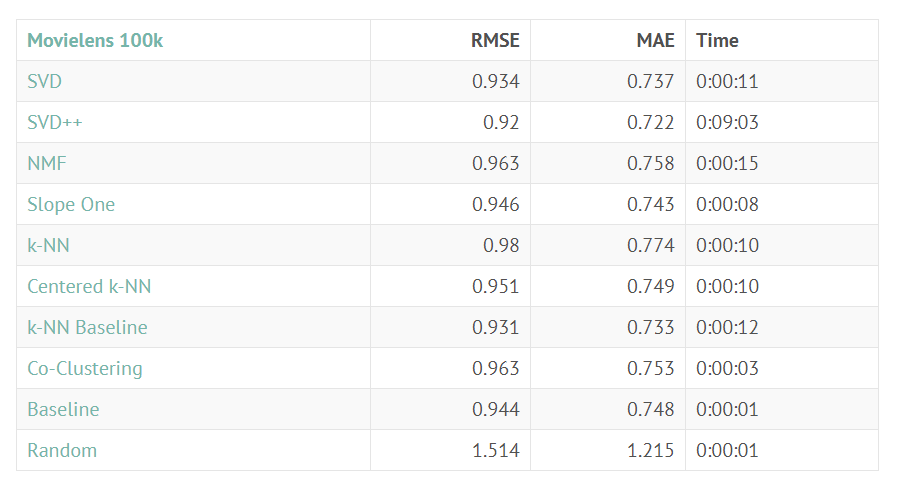 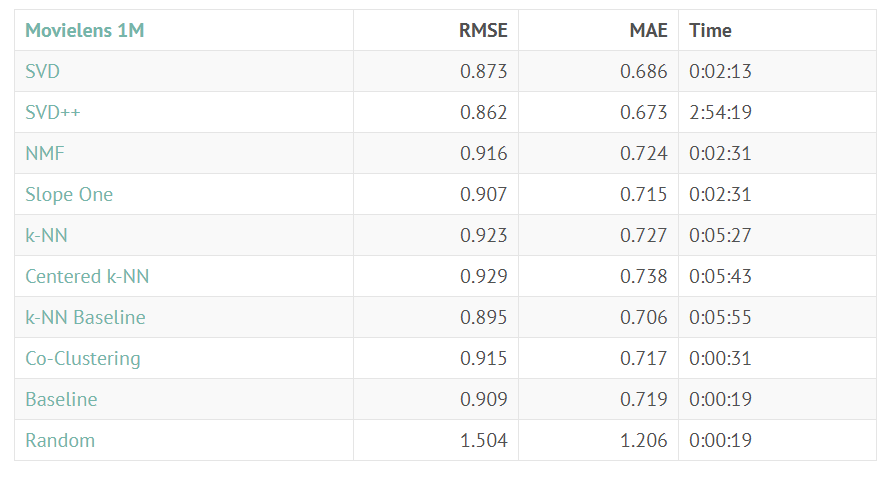